## Dependencias

In [1]:
import ifcopenshell
from rdflib import Graph, Namespace, URIRef, Literal, RDF
from py2neo import Graph as Neo4jGraph, Node, Relationship
import re

## CONFIGURAÇÕES

In [2]:
IFC_FILE = "../data/Building-Architecture.ifc"
NEO4J_URI = "bolt://localhost:7687"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "ifc123456"
NEO4J_DATABASE = "ifctest"

## Conectando ao banco de dados

In [3]:
graph_db = Neo4jGraph(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

## Carregando modelo ifc

In [4]:
model = ifcopenshell.open(IFC_FILE)

In [5]:
produtos = model.by_type("IfcProduct")

In [ ]:
# Explorando os produtos e entendendo suas relações
produtos

[#172=IfcBuildingElementProxy('1wADrO19H3w980h1wUyXLk',#1,'Group#18',$,$,#175,$,'454425.1027891.979946.932083.920029.919427.2037909',$),
 #302=IfcBuildingElementProxy('0bo7_K6az7AA$4RxkSNVNM',#1,'Group#19',$,$,#303,$,'454425.1027891.979946.932083.2037918',$),
 #417=IfcBuildingElementProxy('2F44QMqSH3TOkM$SZoqCBe',#1,'origin','The local position for coordination of aspect models.','origin',#423,#433,'454425.1027891.1032757',$),
 #436=IfcBuildingElementProxy('3Fit2Fad92zf2f6aWdJtF5',#1,'geo-reference','The reference point for transforming the local engineering coordinate system into the coordinate reference system of the underlying map.','origin',#442,#452,'454425.1032696',$),
 #296=IfcChimney('3dkFAzOGrAIuOzY_RdrdVv',#1,'house - chimney','A chimney, standing tall and proud, guiding smoke away from the home.','flue',#297,$,'454425.1027891.979946.932083.2023772',$),
 #399=IfcEarthworksFill('3_4VN63S96DfWiJjgG8j1C',#1,'sand bedding','A layer of ground floor sand bedding, providing a stable

## CRIAR GRAFO RDF COM DADOS BÁSICOS

In [ ]:

ns = Namespace("http://example.org/ifc/") # Define a namespace for RDF que é usado para identificar os recursos IFC
rdf_graph = Graph()

## Populando o grafo com dados do modelo ifc

In [8]:
for element in produtos:
    if not element.GlobalId:
        continue

    uri = URIRef(ns[element.GlobalId])
    rdf_graph.add((uri, RDF.type, URIRef(ns[element.is_a()])))
    if element.Name:
        rdf_graph.add((uri, ns["name"], Literal(element.Name)))

print(f"📊 Grafo RDF gerado com {len(rdf_graph)} triplas.")

📊 Grafo RDF gerado com 44 triplas.


## Explorando o grafo

In [9]:
rdf_graph

<Graph identifier=N8eb6476e86724dc19e51b5a716c10766 (<class 'rdflib.graph.Graph'>)>

In [13]:
rdf_graph.qname(URIRef(ns["name"]))

'ns1:name'

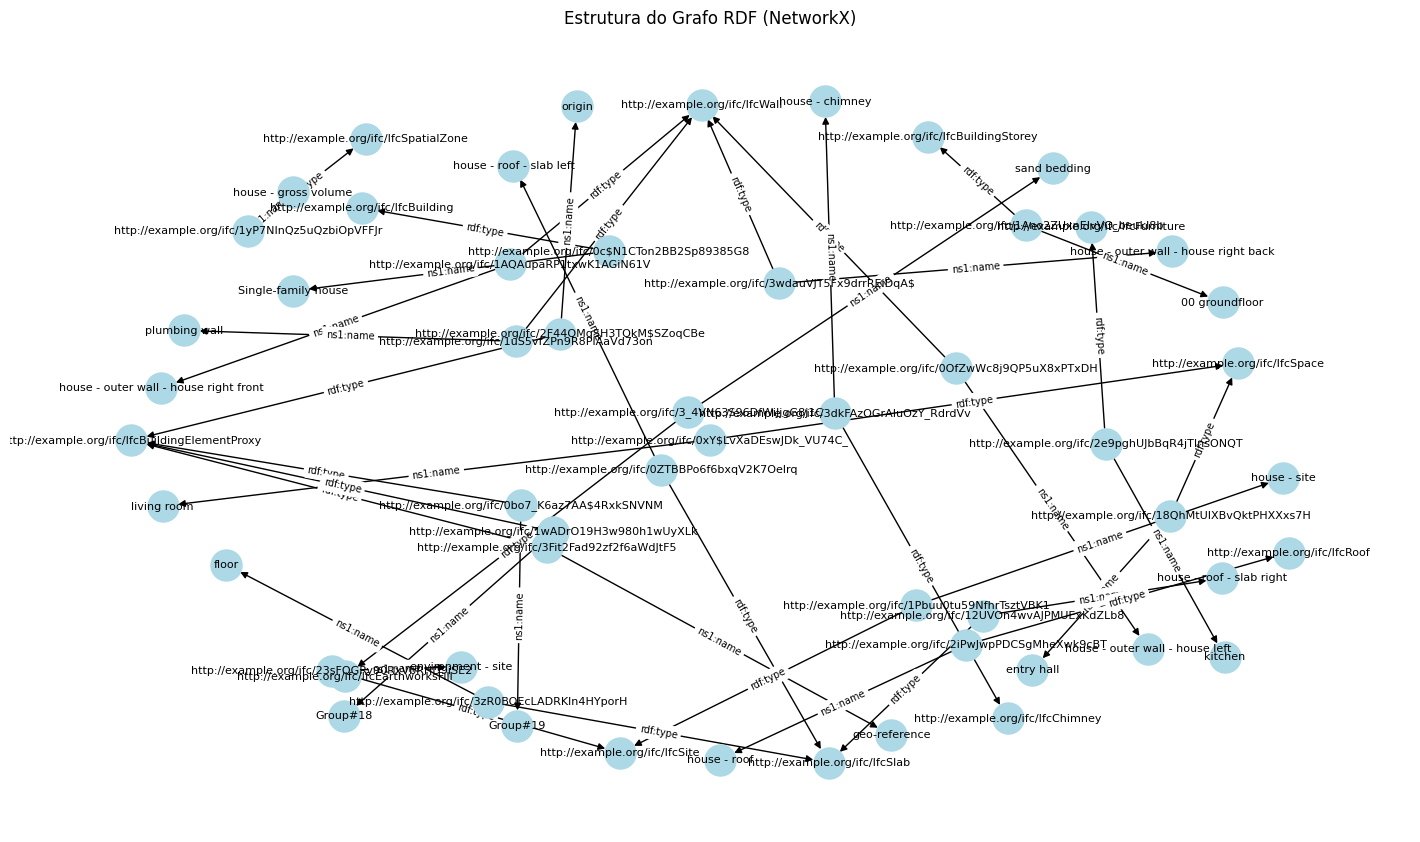

In [14]:
import networkx as nx

import matplotlib.pyplot as plt

# Converter o grafo RDF para um grafo NetworkX
G = nx.DiGraph()
for s, p, o in rdf_graph:
    G.add_edge(str(s), str(o), label=rdf_graph.qname(p))

plt.figure(figsize=(14, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=8, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.title("Estrutura do Grafo RDF (NetworkX)")
plt.show()